In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv("Wuppi convertido.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,0,0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,25/01/2024 09:26:42 a. m.,1.0,0.0,0.0,0.0
1,1,1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,25/01/2024 09:26:46 a. m.,1.0,0.0,0.0,0.0
2,2,2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,25/01/2024 09:26:48 a. m.,1.0,0.0,0.0,0.0
3,3,3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,25/01/2024 09:26:57 a. m.,1.0,0.0,0.0,0.0
4,4,4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,25/01/2024 09:26:58 a. m.,1.0,0.0,0.0,0.0


In [19]:
df = df.drop(columns=["Unnamed: 0.1","Unnamed: 0","fecha"])

KeyError: "['Unnamed: 0.1', 'Unnamed: 0', 'fecha'] not found in axis"

# Columna objetivo Tiempo de Interacción

In [8]:
Corr_Factors =df.corr()
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,0.367783,0.057388,0.023198,0.006635,0.080123,0.055421,0.099609,0.080074,0.004080,0.044328,0.020546
Usuario,0.367783,1.000000,0.089893,0.079054,0.087822,0.099914,0.088253,0.100570,0.350478,0.123459,0.071091,0.023883
botón correcto,0.057388,0.089893,1.000000,0.903912,0.434521,0.691533,0.999374,0.026733,0.031036,0.035770,0.612377,0.277868
tiempo de interacción,0.023198,0.079054,0.903912,1.000000,0.395837,0.802379,0.902371,0.051854,0.057443,0.063312,0.554115,0.251431
mini juego,0.006635,0.087822,0.434521,0.395837,1.000000,0.282634,0.434362,0.086657,0.108371,0.001500,0.029536,0.642302


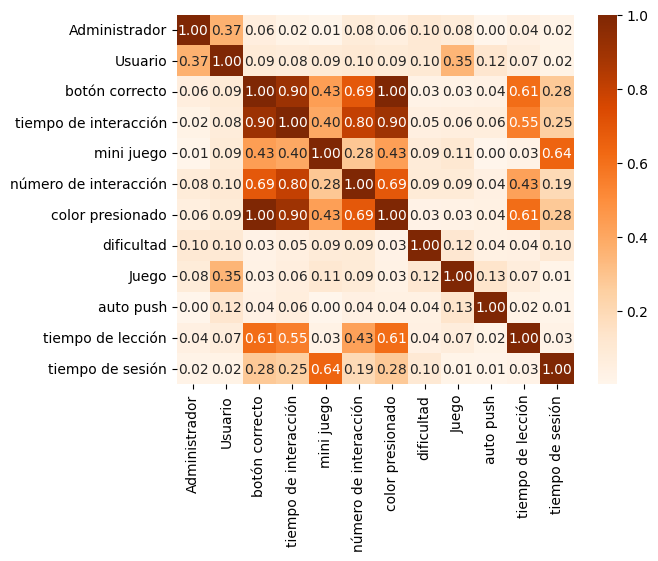

In [9]:
Heat_Map = sns.heatmap(Corr_Factors1, cmap="Oranges", annot=True, fmt=".2f")

# Correlaciones 
1. Administrador            0.02
2. Usuario                  0.079
3. botón correcto           0.90
4. tiempo de interacción    1.00
5. mini juego               0.40
6. número de interacción    0.80
7. color presionado         0.90
8. dificultad               0.052
9. Juego                    0.057
10. auto push                0.06
11. tiempo de lección        0.55
12. tiempo de sesión         0.25

# Modelos 
   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática") R=0.906 descartado

            y = a*exp(-bx) + c   ("Función exponencial") descartado R=0.25

            y = 1/a*x           ("Función inversa") R=0.86 descartado

            y = a*np.sin(x) + b ("Función senoidal") R=0.73 descartado

            y = a*np.tan(x) + b ("Función tangencial") R=0.906

            y = a*np.abs(x) + b*x + c (Función Valor absoluto) R=0.903 descartado

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) error descartado 

            y = a*np.log(x) + b  (Función logaritmica) R=0.96

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes) R=0.95 descartado

            y = 1/a*x**2  (Función cuadrática inversa) R=0.95 descartado

            y = a/b*x**2 + c*x (Función polinomial inversa) R=0.96


In [10]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[["botón correcto"]]
Var_Dep= df["tiempo de interacción"]

In [11]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [1. 1.]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/lk/1s80q3g16rl6xn6yqybdsx3m0000gn/T/ipykernel_76230/2688929547.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs = curve_fit(func1, df["botón correcto"], df["tiempo de interacción"])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


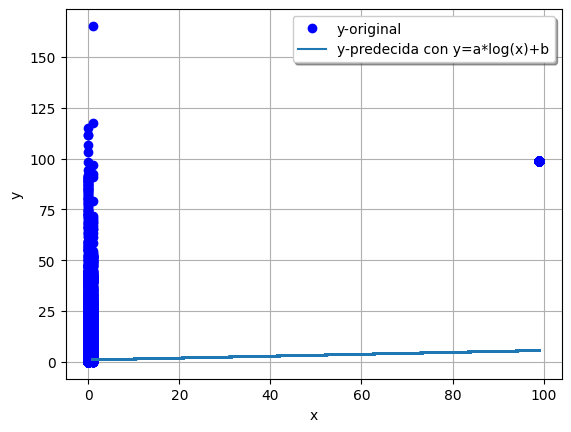

ValueError: Input contains infinity or a value too large for dtype('float64').

In [13]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[["botón correcto"]]
Var_Dep= df["tiempo de interacción"]
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep
def func1(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  


# Ajuste de la curva  
parametros1, covs = curve_fit(func1, df["botón correcto"], df["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  

y_pred1 = func1(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

Parámetros ajustados: [-0.06157016  0.8591504   8.09476015]


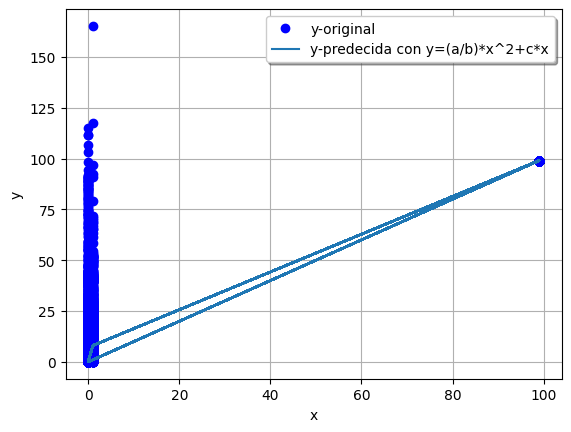

R^2 del Modelo 1: 0.7645030349761706
R del Modelo 1: 0.8743586420778207


In [18]:

def func1(x, a, b, c):  
    """Función polinómica inversa: y = (a/b) * x^2 + c * x"""  
    return (a / b) * x**2 + c * x  


parametros1, covs = curve_fit(func1, df["botón correcto"], df["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
 
y_pred1 = func1(x, *parametros1)  

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  
plt.plot(x, y_pred1, label="y-predecida con y=(a/b)*x^2+c*x")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación 
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R) 

# Analisis por usuario

# Leornado

In [ ]:
#leornardo (1)
df_filtrado1 = df[df['Usuario'] == 1]  
df_filtrado1.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
179,3.0,1.0,1.0,10.558070,9.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0
180,3.0,1.0,0.0,1.249828,9.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0
181,3.0,1.0,1.0,1.866516,9.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0
182,3.0,1.0,0.0,10.099820,9.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
183,3.0,1.0,0.0,17.817100,9.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


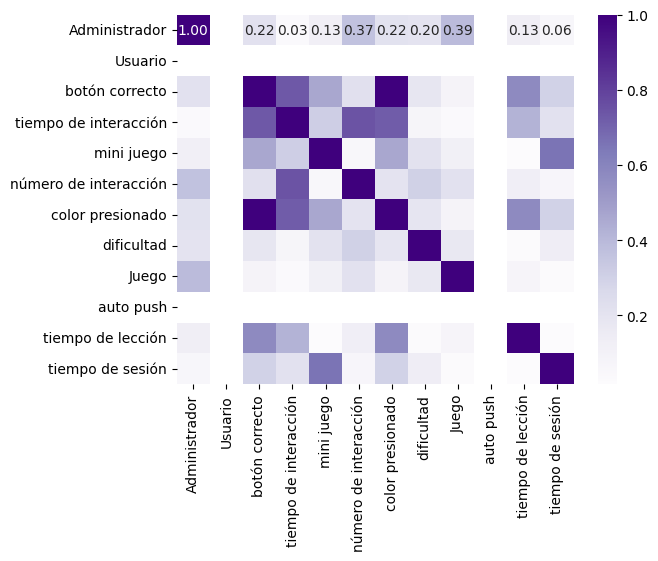

In [ ]:
#Heat map 
Corr_Factors =df_filtrado1.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_Leonardo = sns.heatmap(Corr_Factors, cmap="Purples", annot=True, fmt=".2f")

In [ ]:
Corr_Factors = abs(Corr_Factors)
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,NaN,0.219028,0.034486,0.127578,0.365267,0.216252,0.202905,0.390477,NaN,0.132274,0.064751
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,0.219028,NaN,1.000000,0.731554,0.465786,0.221510,0.999082,0.189427,0.088227,NaN,0.574275,0.297817
tiempo de interacción,0.034486,NaN,0.731554,1.000000,0.314546,0.749820,0.723016,0.072243,0.036795,NaN,0.421830,0.218760
mini juego,0.127578,NaN,0.465786,0.314546,1.000000,0.056208,0.465747,0.209324,0.118064,NaN,0.018425,0.655218
número de interacción,0.365267,NaN,0.221510,0.749820,0.056208,1.000000,0.206772,0.302081,0.218309,NaN,0.130341,0.067595
color presionado,0.216252,NaN,0.999082,0.723016,0.465747,0.206772,1.000000,0.191266,0.087333,NaN,0.573850,0.297597
dificultad,0.202905,NaN,0.189427,0.072243,0.209324,0.302081,0.191266,1.000000,0.174625,NaN,0.031090,0.137281
Juego,0.390477,NaN,0.088227,0.036795,0.118064,0.218309,0.087333,0.174625,1.000000,NaN,0.076776,0.031871
auto push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Utlizando como variable objetivo

### tiempo de interacción con boton correcto (Correlación de 0.73)

In [ ]:
Vars_Indep= df_filtrado1[["botón correcto"]]
Var_Dep= df_filtrado1["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [20.21278975  6.1198086 ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


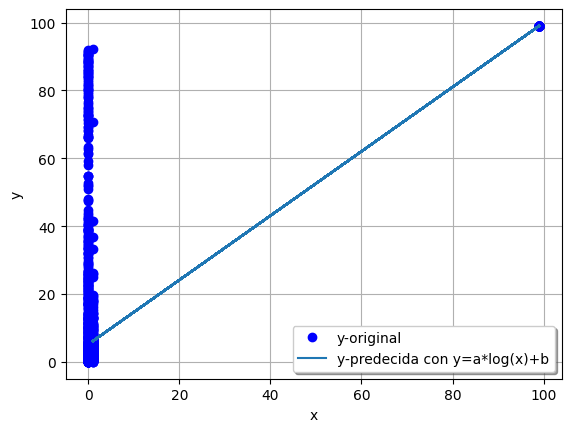

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
def func1(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado1 = df_filtrado1[df_filtrado1["botón correcto"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func1, df_filtrado1["botón correcto"], df_filtrado1["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
  
y_pred1 = func1(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### botón correcto con tiempo de interacción (Correlación 0.73)

In [ ]:
Vars_Indep= df_filtrado1[["tiempo de interacción"]]
Var_Dep= df_filtrado1["botón correcto"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [ 21.14424172 -19.79182383]


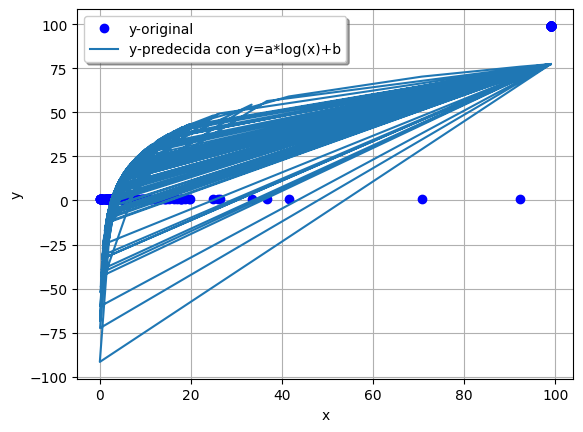

R^2 del Modelo 1: 0.7071422477536252
R del Modelo 1: 0.8409175035362418


In [ ]:
def func2(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado1 = df_filtrado1[df_filtrado1["tiempo de interacción"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func2, df_filtrado1["tiempo de interacción"], df_filtrado1["botón correcto"])  


print("Parámetros ajustados:", parametros1)  

 
y_pred1 = func2(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### color presionado con tiempo de interación (Correlación simple 0.72)

In [ ]:
Vars_Indep= df_filtrado1[["tiempo de interacción"]]
Var_Dep= df_filtrado1["color presionado"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [ 20.79855676 -17.94750313]


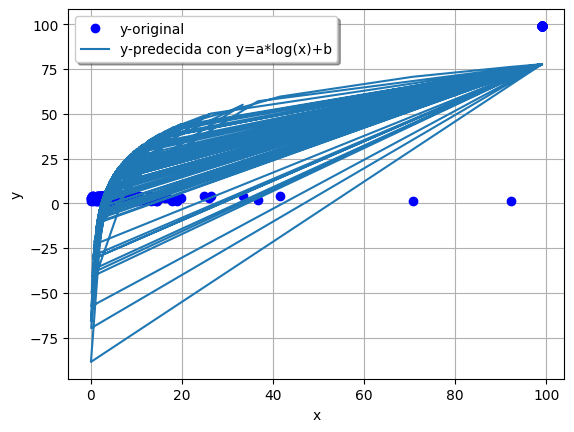

R^2 del Modelo 1: 0.704873270027931
R del Modelo 1: 0.8395673111954342


In [ ]:
def func3(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado1 = df_filtrado1[df_filtrado1["tiempo de interacción"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func3, df_filtrado1["tiempo de interacción"], df_filtrado1["color presionado"])  


print("Parámetros ajustados:", parametros1)  

y_pred1 = func3(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Dificultad con mini juego 0.190457

In [ ]:
Vars_Indep= df_filtrado1[["mini juego"]]
Var_Dep= df_filtrado1["dificultad"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [ 100.05022645 -100.04131625    1.99495008]


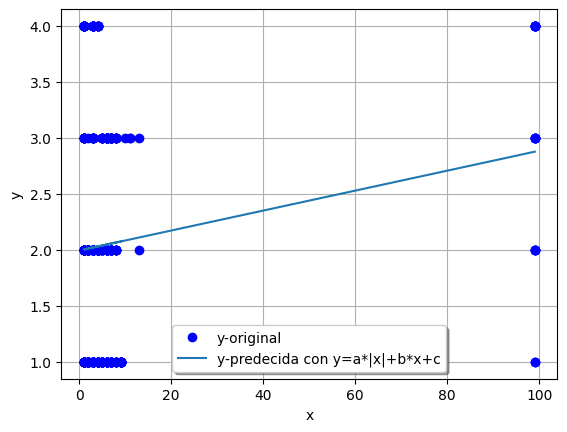

R^2 del Modelo 1: 0.036273979821967006
R del Modelo 1: 0.1904572913331674


In [ ]:
def func4(x, a, b, c):  
    """Función de valor absoluto: y = a * |x| + b * x + c"""  
    return a * np.abs(x) + b * x + c  
 

# Ajuste de la curva  
parametros1, covs = curve_fit(func4, df_filtrado1["mini juego"], df_filtrado1["dificultad"])  

# Mostrar los parámetros optimizados  
print("Parámetros ajustados:", parametros1)  

# Predecir los valores de y usando los parámetros ajustados  
y_pred1 = func4(x, *parametros1)  

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=a*|x|+b*x+c")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación R^2  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R) 


# Ma del Rosario

In [15]:
#MA del rosario
df_filtrado2 = df[df['Usuario'] == 24]  
df_filtrado2.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
5713,1.0,24.0,1.0,19.303690,3.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0
5714,1.0,24.0,1.0,6.267806,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
5715,1.0,24.0,1.0,5.766922,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
5716,1.0,24.0,0.0,7.450372,3.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0
5717,1.0,24.0,0.0,7.564992,3.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0


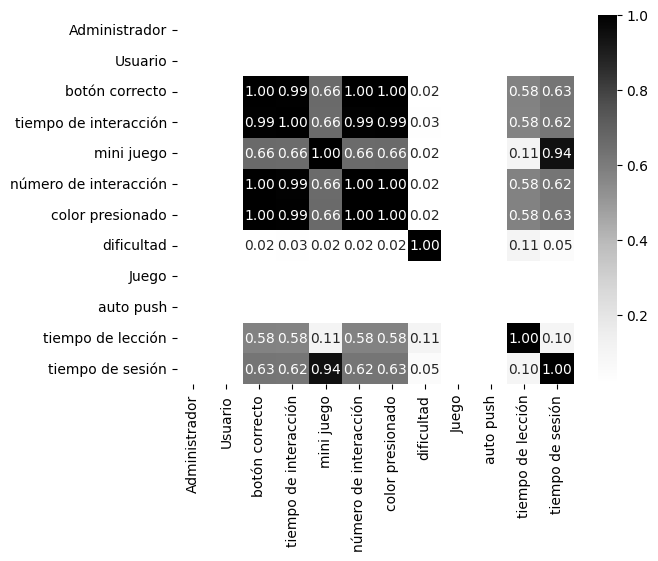

In [20]:
#Heat map 
Corr_Factors =df_filtrado2.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Greys", annot=True, fmt=".2f")

In [21]:
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,NaN,NaN,1.000000,0.993117,0.662648,0.998162,0.999520,0.022086,NaN,NaN,0.579607,0.625791
tiempo de interacción,NaN,NaN,0.993117,1.000000,0.658366,0.990116,0.993217,0.025889,NaN,NaN,0.575772,0.621650
mini juego,NaN,NaN,0.662648,0.658366,1.000000,0.661220,0.662282,0.016640,NaN,NaN,0.108718,0.944773
número de interacción,NaN,NaN,0.998162,0.990116,0.661220,1.000000,0.997668,0.020706,NaN,NaN,0.578530,0.624627
color presionado,NaN,NaN,0.999520,0.993217,0.662282,0.997668,1.000000,0.015142,NaN,NaN,0.579412,0.625580
dificultad,NaN,NaN,0.022086,0.025889,0.016640,0.020706,0.015142,1.000000,NaN,NaN,0.109785,0.046691
Juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auto push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### tiempo de interaccion como objetvio  con boton correcto (0.982055)

In [22]:
Vars_Indep= df_filtrado2[["botón correcto"]]
Var_Dep= df_filtrado2["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [20.18248863  6.25904587]


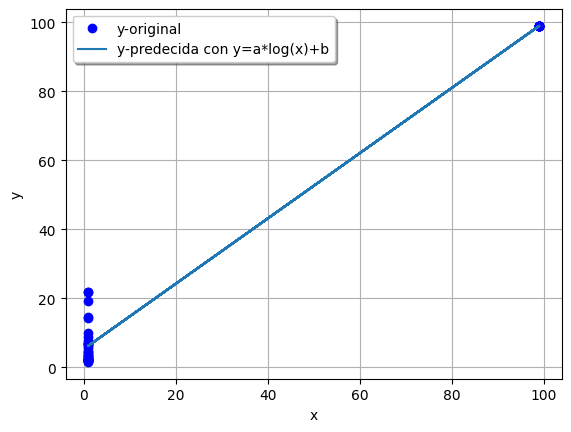

R^2 del Modelo 1: 0.9876339832306752
R del Modelo 1: 0.9937977577106296


In [23]:
def func5(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado2 = df_filtrado2[df_filtrado2["botón correcto"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func5, df_filtrado2["botón correcto"], df_filtrado2["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["botón correcto"].values  
y = df_filtrado2["tiempo de interacción"].values    
y_pred1 = func5(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Boton correcto con tiempo de interacción (0.982055)

In [24]:
Vars_Indep= df_filtrado2[["tiempo de interacción"]]
Var_Dep= df_filtrado2["botón correcto"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [ 26.35189617 -34.08521207]


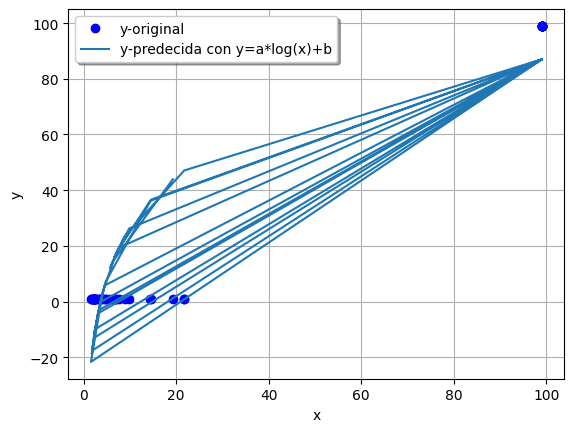

R^2 del Modelo 1: 0.8272015720511787
R del Modelo 1: 0.9095062243059026


In [25]:
def func5(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado2 = df_filtrado2[df_filtrado2["tiempo de interacción"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func5, df_filtrado2["tiempo de interacción"], df_filtrado2["botón correcto"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["botón correcto"].values    
y_pred1 = func5(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Color presionado (0.981504)

In [ ]:
Vars_Indep= df_filtrado2[["tiempo de interacción"]]
Var_Dep= df_filtrado2["color presionado"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [ 25.96022006 -32.03472089]


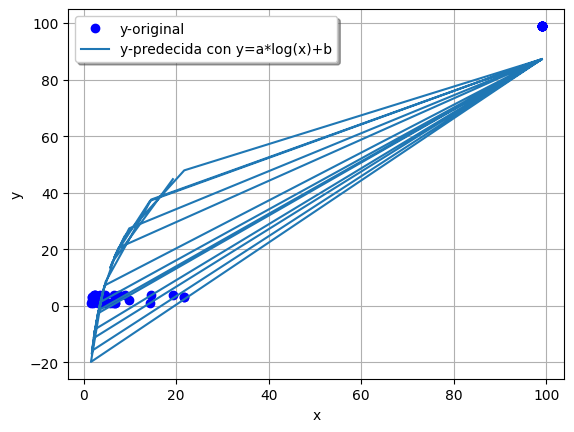

R^2 del Modelo 1: 0.828521423983717
R del Modelo 1: 0.910231522187469


In [26]:
def func5(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado2 = df_filtrado2[df_filtrado2["tiempo de interacción"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func5, df_filtrado2["tiempo de interacción"], df_filtrado2["color presionado"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["color presionado"].values    
y_pred1 = func5(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Dificultad

In [ ]:
Vars_Indep= df_filtrado2[["tiempo de lección"]]
Var_Dep= df_filtrado2["dificultad"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [-0.03645039  2.67140074]


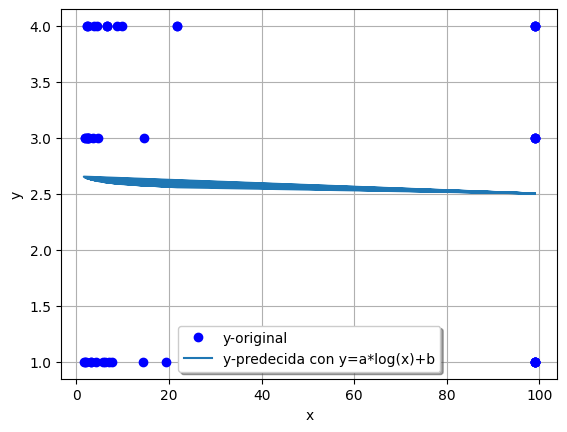

R^2 del Modelo 1: 0.0018920518534162323
R del Modelo 1: 0.0434977223934338


In [27]:
def func5(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

df_filtrado2 = df_filtrado2[df_filtrado2["tiempo de interacción"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func5, df_filtrado2["tiempo de interacción"], df_filtrado2["dificultad"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["dificultad"].values    
y_pred1 = func5(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

# Nicolas

In [ ]:
#Nicolas
df_filtrado3 = df[df['Usuario'] == 3]  
df_filtrado3.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,1.0,0.0,0.00000,0.0
2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,1.0,0.0,0.00000,0.0
7,2.0,3.0,1.0,22.467780,9.0,8.0,3.0,1.0,1.0,0.0,0.00000,0.0
11,2.0,3.0,1.0,18.167480,9.0,12.0,1.0,1.0,1.0,0.0,0.00000,0.0
12,2.0,3.0,99.0,99.000000,9.0,99.0,99.0,1.0,1.0,0.0,63.80254,0.0


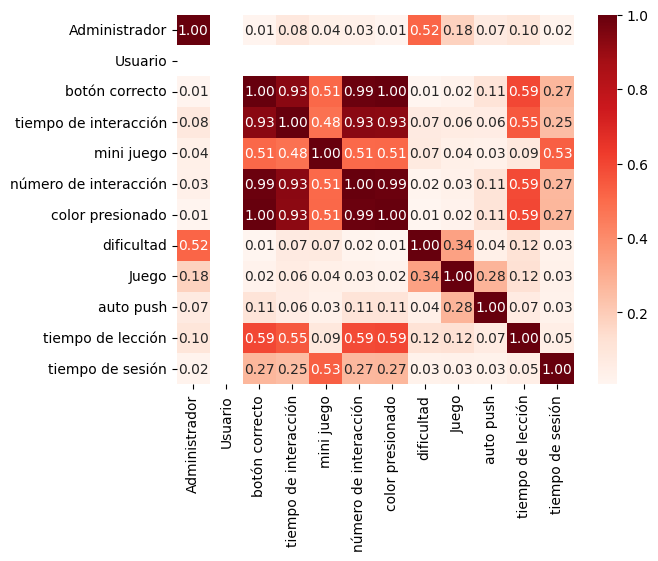

In [ ]:
#Heat map 
Corr_Factors =df_filtrado3.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Reds", annot=True, fmt=".2f")

In [ ]:
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,NaN,0.011541,0.082261,0.039360,0.034366,0.014283,0.518637,0.178724,0.070043,0.097565,0.021219
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,0.011541,NaN,1.000000,0.926496,0.510994,0.990440,0.999708,0.008378,0.024940,0.111363,0.594225,0.269348
tiempo de interacción,0.082261,NaN,0.926496,1.000000,0.482283,0.927269,0.926057,0.072983,0.062042,0.060768,0.550548,0.249550
mini juego,0.039360,NaN,0.510994,0.482283,1.000000,0.506503,0.510877,0.073603,0.041039,0.033969,0.088092,0.532030
número de interacción,0.034366,NaN,0.990440,0.927269,0.506503,1.000000,0.989992,0.015626,0.030860,0.109246,0.588545,0.266773
color presionado,0.014283,NaN,0.999708,0.926057,0.510877,0.989992,1.000000,0.007186,0.023778,0.109064,0.594052,0.269269
dificultad,0.518637,NaN,0.008378,0.072983,0.073603,0.015626,0.007186,1.000000,0.336187,0.041742,0.117290,0.028583
Juego,0.178724,NaN,0.024940,0.062042,0.041039,0.030860,0.023778,0.336187,1.000000,0.275847,0.124103,0.030688
auto push,0.070043,NaN,0.111363,0.060768,0.033969,0.109246,0.109064,0.041742,0.275847,1.000000,0.066175,0.029995


### tiempo de interaccion (0.93)  no funciono la logaritmica

In [ ]:
Vars_Indep= df_filtrado3[["botón correcto"]]
Var_Dep= df_filtrado3["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

### boton correcto con numero de interacción (0.99)

In [ ]:
Vars_Indep= df_filtrado3[["número de interacción"]]
Var_Dep= df_filtrado3["botón correcto"]
x= Vars_Indep
y= Var_Dep

### color presionado con número de interacción (0.99)

In [ ]:
Vars_Indep= df_filtrado3[["número de interacción"]]
Var_Dep= df_filtrado3["color presionado"]
x= Vars_Indep
y= Var_Dep

### dificultad con administardor (0.52)

In [ ]:
Vars_Indep= df_filtrado3[["administrador"]]
Var_Dep= df_filtrado3["dificultad"]
x= Vars_Indep
y= Var_Dep

# Rene

In [ ]:
#Rene
df_filtrado4 = df[df['Usuario'] == 27]  
df_filtrado4.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
2549,1.0,27.0,1.0,29.30709,6.0,1.0,4.0,3.0,2.0,0.0,0.0,0.0
2550,1.0,27.0,1.0,27.90788,6.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0
2552,1.0,27.0,1.0,16.30686,6.0,4.0,4.0,3.0,2.0,0.0,0.0,0.0
2562,1.0,27.0,1.0,11.98156,6.0,14.0,2.0,3.0,2.0,0.0,0.0,0.0
2569,1.0,27.0,1.0,14.44868,6.0,21.0,4.0,3.0,2.0,0.0,0.0,0.0


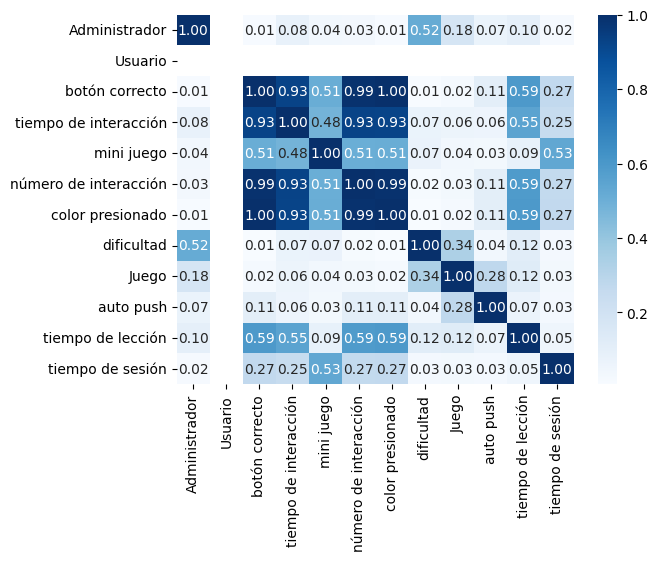

In [ ]:
#Heat map 
Corr_Factors =df_filtrado3.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Blues", annot=True, fmt=".2f")

### tiempo de interaccion con botón correcto (0.85)

In [ ]:
Vars_Indep= df_filtrado4[["botón correcto"]]
Var_Dep= df_filtrado4["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [16.05786757 25.212174  ]


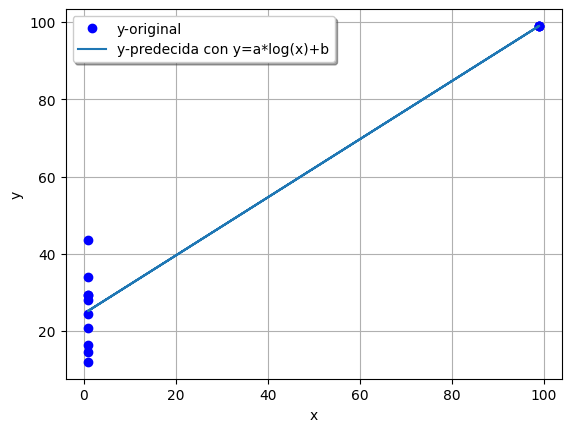

R^2 del Modelo 1: 0.9483102751957198
R del Modelo 1: 0.97381223816284


In [ ]:
def func9(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

#df_filtrado2 = df_filtrado2[df_filtrado2["botón correcto"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func9, df_filtrado4["botón correcto"], df_filtrado4["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func9(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### boton correcto con número de interacción (0.98) no sirvió la logaritmica

In [ ]:
Vars_Indep= df_filtrado4[["número de interacción"]]
Var_Dep= df_filtrado4["botón correcto"]
x= Vars_Indep
y= Var_Dep

### color presionado con número de interacción (0.98)

In [ ]:
Vars_Indep= df_filtrado4[["número de interacción"]]
Var_Dep= df_filtrado4["color presionado"]
x= Vars_Indep
y= Var_Dep

### dificultad con adminstrador 0.54

In [ ]:
Vars_Indep= df_filtrado4[["administrador"]]
Var_Dep= df_filtrado4["dificultad"]
x= Vars_Indep
y= Var_Dep

# Sergio Angel

In [ ]:
#Sergio Angel
df_filtrado5 = df[df['Usuario'] == 8]  
df_filtrado5.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
679,5.0,8.0,1.0,2.946720,9.0,1.0,4.0,1.0,1.0,0.0,0.00000,0.0
680,5.0,8.0,1.0,2.066744,9.0,2.0,2.0,1.0,1.0,0.0,0.00000,0.0
681,5.0,8.0,1.0,2.600328,9.0,3.0,3.0,1.0,1.0,0.0,0.00000,0.0
682,5.0,8.0,1.0,3.249712,9.0,4.0,1.0,1.0,1.0,0.0,0.00000,0.0
683,5.0,8.0,99.0,99.000000,9.0,99.0,99.0,1.0,1.0,0.0,25.96476,0.0


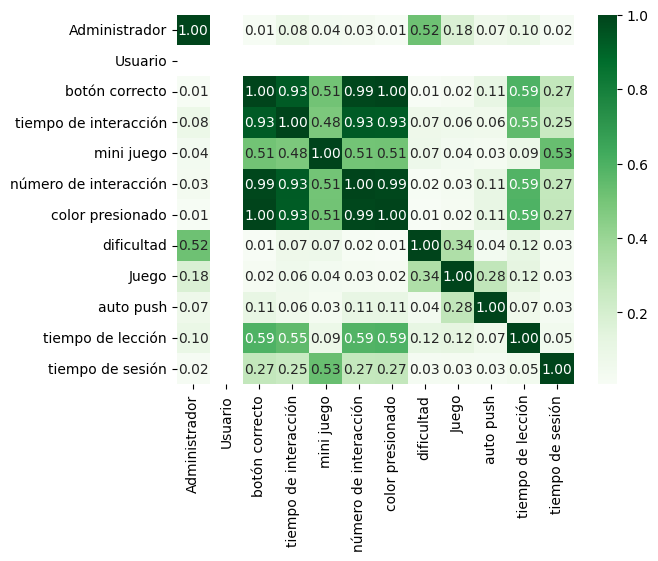

In [ ]:
#Heat map 
Corr_Factors =df_filtrado3.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Greens", annot=True, fmt=".2f")

### tiempo de interaccion con botón correcto (0.85)

In [ ]:
Vars_Indep= df_filtrado5[["botón correcto"]]
Var_Dep= df_filtrado5["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [20.27297884  5.84323253]


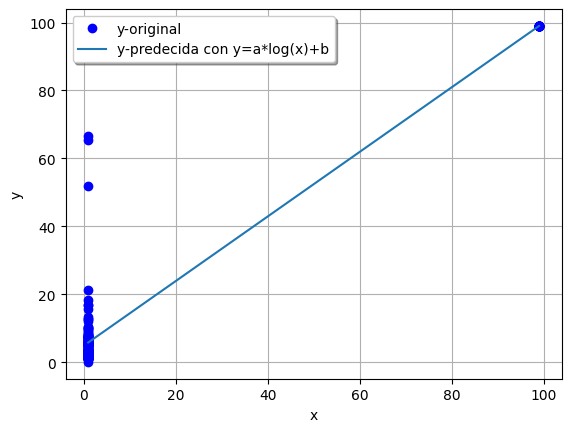

R^2 del Modelo 1: 0.955667260597971
R del Modelo 1: 0.9775823548929118


In [ ]:
def func13(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  

#df_filtrado2 = df_filtrado2[df_filtrado2["botón correcto"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func13, df_filtrado5["botón correcto"], df_filtrado5["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func13(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a*log(x)+b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### boton correcto con número de interacción (0.98) logaritmica no sirvió

In [ ]:
Vars_Indep= df_filtrado5[["número de interacción"]]
Var_Dep= df_filtrado5["botón correcto"]
x= Vars_Indep
y= Var_Dep

### color presionado con número de interacción (0.98) no sirvio logaritmica

In [ ]:
Vars_Indep= df_filtrado5[["número de interacción"]]
Var_Dep= df_filtrado5["color presionado"]
x= Vars_Indep
y= Var_Dep

### dificultad con administrador (0.54) no sirvio logaritmica

In [ ]:
Vars_Indep= df_filtrado5[["Administrador"]]
Var_Dep= df_filtrado5["dificultad"]
x= Vars_Indep
y= Var_Dep